In [5]:
import pandas as pd

In [7]:
movies = pd.read_csv('movies.csv')
movies 


,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [9]:
directors = pd.read_csv('directors.csv')  # Replace with your directors file path
directors

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male
...,...,...,...,...
2344,2344,Shane Carruth,7106,Male
2345,2345,Neill Dela Llana,7107,NaN
2346,2346,Scott Smith,7108,NaN
2347,2347,Daniel Hsia,7109,Male


In [8]:
# Merge datasets on director_id and id
merged_data = pd.merge(movies, directors, left_on='director_id', right_on='id', how='inner')
merged_data

,Unnamed: 0_x,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,Unnamed: 0_y,director_name,id_y,gender
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,0,James Cameron,4762,Male
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,1,Gore Verbinski,4763,Male
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,2,Sam Mendes,4764,Male
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,3,Christopher Nolan,4765,Male
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,5,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,47,Martin Scorsese,4809,Male
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,607,Kevin Smith,5369,Male
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,386,Uwe Boll,5148,Male
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,773,Richard Linklater,5535,Male


In [9]:
# Top 10 highest-grossing movies
top_grossing_movies = merged_data.nlargest(10, 'revenue')[['title', 'revenue']]
top_grossing_movies

,title,revenue
0,Avatar,2787965087
19,Titanic,1845034188
30,Furious 7,1506249360
36,Transformers: Dark of the Moon,1123746996
199,The Lord of the Rings: The Return of the King,1118888979
21,Skyfall,1108561013
26,Transformers: Age of Extinction,1091405097
3,The Dark Knight Rises,1084939099
8,Pirates of the Caribbean: Dead Man's Chest,1065659812
12,Pirates of the Caribbean: On Stranger Tides,1045713802


In [10]:
# Movies with highest vote average
top_rated_movies = merged_data.nlargest(10, 'vote_average')[['title', 'vote_average']]
top_rated_movies

,title,vote_average
383,Fight Club,8.3
901,Schindler's List,8.3
1284,Pulp Fiction,8.3
45,The Dark Knight,8.2
459,Forrest Gump,8.2
917,GoodFellas,8.2
58,Interstellar,8.1
59,Inception,8.1
199,The Lord of the Rings: The Return of the King,8.1
785,Se7en,8.1


In [11]:
# Number of movies by
movies_by_year = merged_data['year'].value_counts()
movies_by_year

,count
year,
2006,73
2005,71
2002,69
2008,67
2011,67
2009,66
1999,64
2010,63
2001,62


In [13]:
# Gender-based analysis
gender_analysis = merged_data.groupby('gender').agg({
    'title': 'count',
    'revenue': 'mean',
    'vote_average': 'mean'
}).rename(columns={'title': 'movie_count'})
gender_analysis

,movie_count,revenue,vote_average
gender,,,
Female,32,1.384982e+08,6.262500
Male,1309,1.480160e+08,6.381742


In [14]:
# Most popular directors
popular_directors = merged_data.groupby('director_name')['popularity'].mean().nlargest(10)
popular_directors

,popularity
director_name,
Christopher Nolan,185.000000
Francis Lawrence,99.000000
Gore Verbinski,95.428571
Peter Jackson,87.444444
George Miller,86.428571
James Cameron,79.142857
David Fincher,75.500000
Quentin Tarantino,72.250000
Zack Snyder,71.857143


In [16]:
top_grossing_movies.to_csv('top_grossing_movies.csv', index=False)
top_grossing_movies



,title,revenue
0,Avatar,2787965087
19,Titanic,1845034188
30,Furious 7,1506249360
36,Transformers: Dark of the Moon,1123746996
199,The Lord of the Rings: The Return of the King,1118888979
21,Skyfall,1108561013
26,Transformers: Age of Extinction,1091405097
3,The Dark Knight Rises,1084939099
8,Pirates of the Caribbean: Dead Man's Chest,1065659812
12,Pirates of the Caribbean: On Stranger Tides,1045713802


In [17]:
top_rated_movies.to_csv('top_rated_movies.csv', index=False)
top_rated_movies

,title,vote_average
383,Fight Club,8.3
901,Schindler's List,8.3
1284,Pulp Fiction,8.3
45,The Dark Knight,8.2
459,Forrest Gump,8.2
917,GoodFellas,8.2
58,Interstellar,8.1
59,Inception,8.1
199,The Lord of the Rings: The Return of the King,8.1
785,Se7en,8.1


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


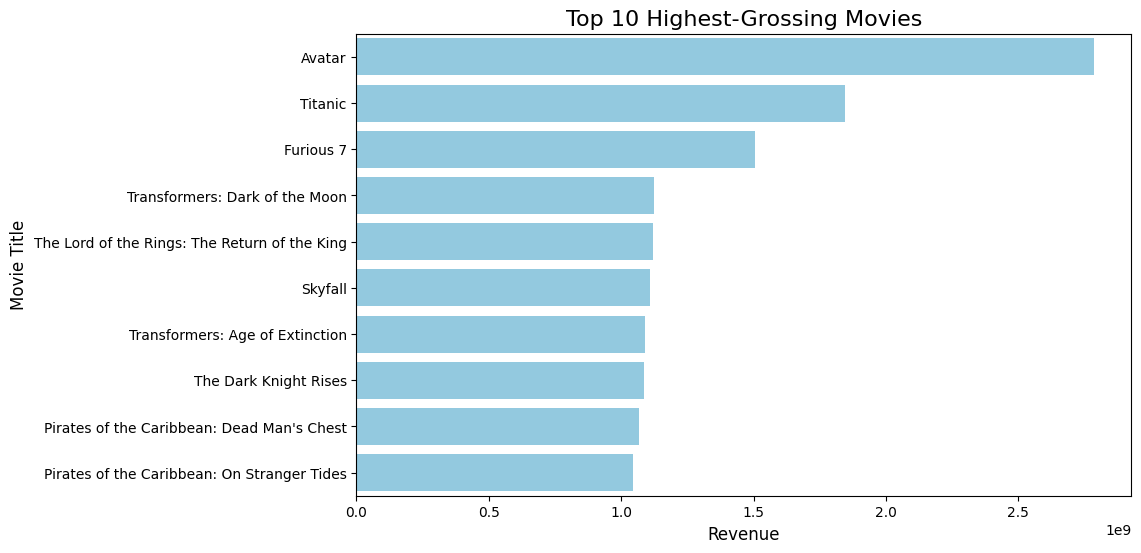

In [23]:
# Plotting Top 10 Grossing Movies
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='title', data=top_grossing_movies, color='skyblue')
plt.title('Top 10 Highest-Grossing Movies', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()
